In [20]:
import numpy as np
import nibabel as nb
from trimesh import Trimesh
import matplotlib.pyplot as plt
from matplotlib_surface_plotting import plot_surf

In [21]:
def get_layer(V, F, surface_index, n_surfs):
    """Retrieve the vertices and faces corresponding to a specific surface layer.

    Args:
        V (numpy.ndarray): Array of vertices representing the entire mesh.
        F (numpy.ndarray): Array of faces representing the entire mesh.
        surface_index (int): Index of the surface layer to retrieve.
        n_surfs (int): Total number of surface layers in the mesh.

    Returns:
        tuple: A tuple containing the surface vertices and faces.
        
    """
    num_vertices_per_surface = len(V) // n_surfs
    
    start_vertex_index = surface_index * num_vertices_per_surface
    end_vertex_index = start_vertex_index + num_vertices_per_surface
    
    mesh=Trimesh(V, F, process=False, validate=False)
    verts_to_keep=np.zeros(V.shape[0])
    verts_to_keep[start_vertex_index:end_vertex_index]=1
    mesh.update_vertices(verts_to_keep.astype(bool))

    return mesh.vertices, mesh.faces

In [22]:
peak_idx=1124

11 surfaces, 43134 vertices per surface


/home/bonaiuto/Dropbox/Projects/inProgress/auditory_laminar/pipeline/mri/matplotlib_surface_plotting.py:10: RuntimeWarning: invalid value encountered in divide
  arr[:, 0] /= lens
/home/bonaiuto/Dropbox/Projects/inProgress/auditory_laminar/pipeline/mri/matplotlib_surface_plotting.py:11: RuntimeWarning: invalid value encountered in divide
  arr[:, 1] /= lens
/home/bonaiuto/Dropbox/Projects/inProgress/auditory_laminar/pipeline/mri/matplotlib_surface_plotting.py:12: RuntimeWarning: invalid value encountered in divide
  arr[:, 2] /= lens


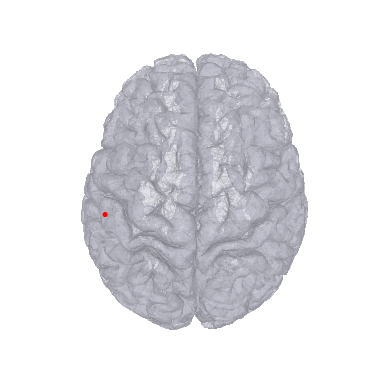

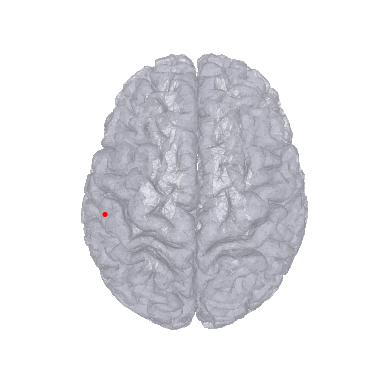

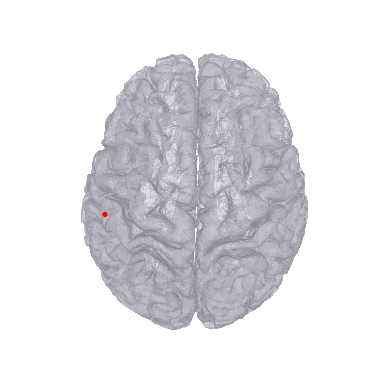

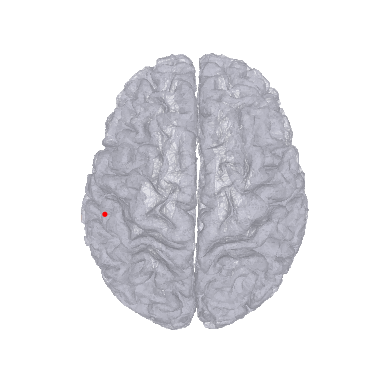

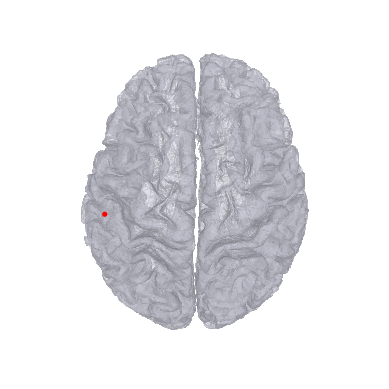

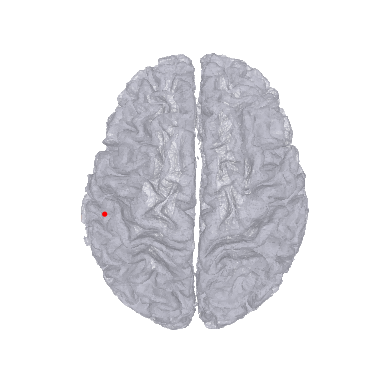

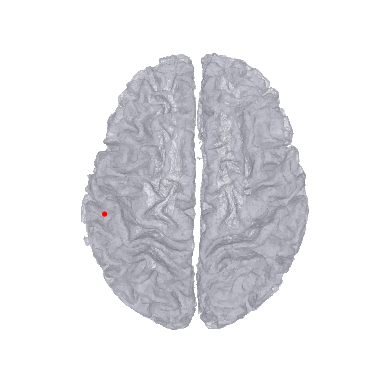

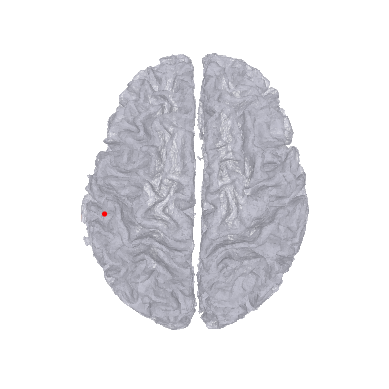

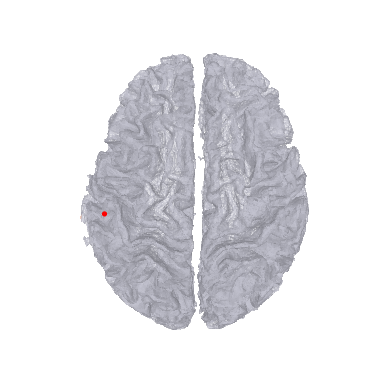

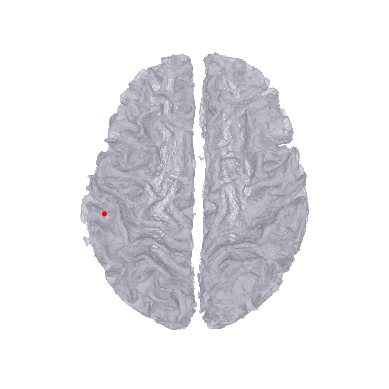

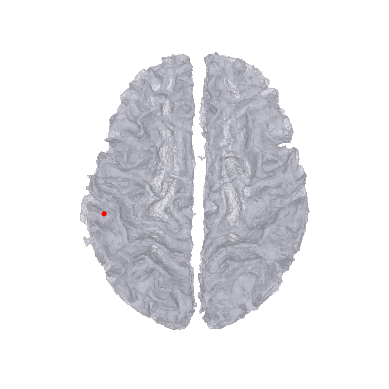

In [23]:
multilayer_fname='/home/bonaiuto/Dropbox/Projects/inProgress/auditory_laminar/derivatives/processed/sub-114/surf/multilayer11.ds.link_vector.nodeep.gii'
# Load multilayer surface
multilayer_surf=nb.load(multilayer_fname);
multilayer_vertices, multilayer_faces = multilayer_surf.darrays[0].data, multilayer_surf.darrays[1].data

n_surfs=11
verts_per_surf=int(multilayer_vertices.shape[0]/n_surfs)
print('{} surfaces, {} vertices per surface'.format(n_surfs,verts_per_surf))

for i in range(n_surfs):
    pial_vertices, pial_faces = get_layer(multilayer_vertices, multilayer_faces, i, n_surfs)
    rotate = [0]
    x_rotate = 0
    fig = plt.figure(facecolor='white')
    # Plot inversion result
    ax = plt.subplot(1, 1, 1, xlim=[-.98, +.98], ylim=[-.98, +.98],
                     aspect=1, frameon=False,
                     xticks=[], yticks=[])
    overlay = np.zeros(pial_vertices.shape[0])
    overlay[0] = 10
    plot_surf(vertices=pial_vertices, faces=pial_faces, overlay=overlay, rotate=rotate, x_rotate=x_rotate,
              ax=ax, colorbar=False, cmap='jet', alpha_colour=(overlay > 0).astype(int), vmin=0, vmax=4,
              transparency=.5, coords=[pial_vertices[peak_idx,:]], coord_size=0.01)    
    
